In [1]:
#try:
  # This command only in Colab.
  #%tBreakpointsensorflow_version 2.x
#except Exception:
  #pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get project files
#!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

#!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255.)
validation_image_generator = ImageDataGenerator(rescale=1./255.)
test_image_generator = ImageDataGenerator(rescale=1./255.)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)


test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    subset=None,
    seed=42
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
#plotImages(sample_training_images[:5])


In [5]:
# 5
train_image_generator = ImageDataGenerator(rescale=1./255.,
        horizontal_flip=True,
        rotation_range=90,
        zoom_range=0.2,
        height_shift_range=0.1,
        width_shift_range=0.1,
    )

#train_random = train_image_generator.random_transform(sample_training_images, seed=32)
print(type(train_image_generator))


<class 'keras.preprocessing.image.ImageDataGenerator'>


In [6]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

#plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


In [7]:
# 7
# Define Sequential model with 3 layers
input_shape = (batch_size, IMG_HEIGHT, IMG_WIDTH, 3)

model = ''

model = Sequential(
    [
        Conv2D(64,(3,3),input_shape=input_shape[1:], activation="relu", name='c1'),
        MaxPooling2D(pool_size=(4,4), name='m1'),
        Conv2D(32,(3,3), activation="relu", name='c2'),
        MaxPooling2D(pool_size=(4,4), name='m2'),
        Flatten(),
        Dense(1, activation="relu", name='d4')
    ], name='model1'
)


model.compile(loss = 'mean_squared_error', metrics='accuracy')







model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 c1 (Conv2D)                 (None, 148, 148, 64)      1792      
                                                                 
 m1 (MaxPooling2D)           (None, 37, 37, 64)        0         
                                                                 
 c2 (Conv2D)                 (None, 35, 35, 32)        18464     
                                                                 
 m2 (MaxPooling2D)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 d4 (Dense)                  (None, 1)                 2049      
                                                                 
Total params: 22,305
Trainable params: 22,305
Non-trainable 

In [8]:
# 8
history = model.fit(
    train_data_gen, 
    steps_per_epoch=None,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=None   
)

Epoch 1/15
16/16 [==============================] - 32s 2s/step - loss: 0.3223 - accuracy: 0.5490 - val_loss: 0.2596 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 32s 2s/step - loss: 0.2465 - accuracy: 0.5670 - val_loss: 0.2633 - val_accuracy: 0.5000
Epoch 3/15
16/16 [==============================] - 32s 2s/step - loss: 0.2550 - accuracy: 0.5595 - val_loss: 0.2629 - val_accuracy: 0.5000
Epoch 4/15
16/16 [==============================] - 34s 2s/step - loss: 0.2446 - accuracy: 0.5660 - val_loss: 0.2749 - val_accuracy: 0.5000
Epoch 5/15
16/16 [==============================] - 32s 2s/step - loss: 0.2381 - accuracy: 0.5990 - val_loss: 0.2696 - val_accuracy: 0.5000
Epoch 6/15
16/16 [==============================] - 32s 2s/step - loss: 0.2339 - accuracy: 0.6160 - val_loss: 0.2849 - val_accuracy: 0.5000
Epoch 7/15
16/16 [==============================] - 30s 2s/step - loss: 0.2329 - accuracy: 0.6125 - val_loss: 0.3065 - val_accuracy: 0.5000
Epoch 8/15
16/16 [==

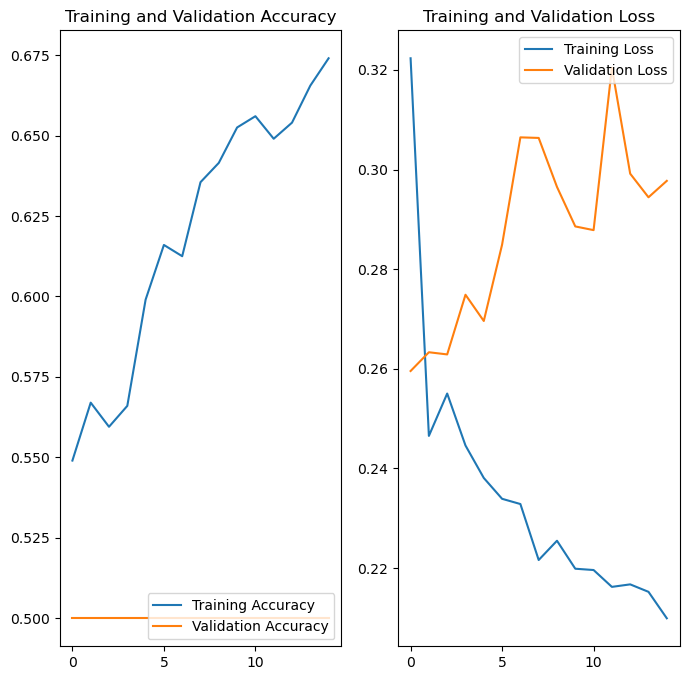

In [9]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
solutions = model.predict(
    test_data_gen,
    batch_size= None
)

probabilities = list(solutions.flatten())
print()

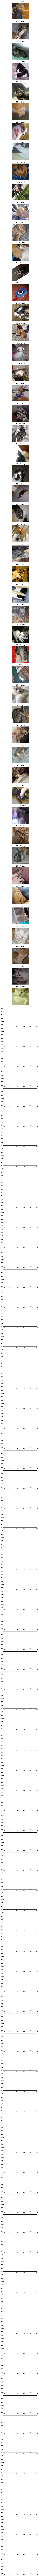

In [13]:
sample_testing_images, _ = next(train_data_gen)
plotImages(sample_testing_images, probabilities)

In [12]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
